In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
def binary_step(data):
    return np.where(data >= 0, 1, 0)

In [3]:
def forward_propagation_xor(data_x):
    #Agregando columna de unos a la data
    bias = np.ones((data_x.shape[0], 1))
    data_x = np.hstack((data_x, bias))
    #Pesos capa oculta y capa de salida
    hl = np.array([[20, 20, -10], [-20, -20, 30]])
    ol = np.array([[20, 20, -30]])
    #Operación
    r_hl = binary_step(np.matmul(hl, data_x.T))
    #Agregando columna de unos
    bias = np.ones((r_hl.shape[1]))
    r_hl = np.vstack((r_hl, bias))
    r_ol = binary_step(np.matmul(ol, r_hl))
    return r_ol, binary_step(np.matmul(hl, data_x.T))

In [4]:
data_x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [5]:
resultado, hl = forward_propagation_xor(data_x)
resultado

array([[0, 1, 1, 0]])

***
## Backpropagation

In [6]:
def sigmoid(data):
    return 1/(1 + np.exp(-data))

In [38]:
def backpropagation(data_x, data_y, lr, epochs):
    bias = np.ones((data_x.shape[0], 1))
    data_x = np.hstack((data_x, bias))
    hw = np.sqrt(1/3)*np.random.randn(3,3)
    ow = np.random.uniform(size=(3,1))
    #predictions = 0
    for epoch in range(epochs):
        hl_o = sigmoid(np.matmul(data_x, hw))
        y_hat = sigmoid(np.matmul(hl_o, ow))
        error = data_y.T - y_hat
        d_yhat = error * y_hat * (1-y_hat)
        error_hl = np.matmul(d_yhat, ow.T)
        d_hl = error_hl * hl_o * (1 - hl_o)
        ow = ow + lr * np.matmul(hl_o.T, d_yhat)
        hw = hw + lr * np.matmul(data_x.T, d_hl)
    return y_hat, hw, ow

In [52]:
resultado_bp, hw, ow = backpropagation(data_x, resultado, 10, 100)

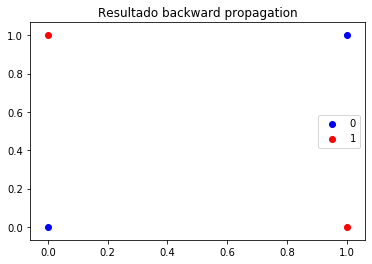

In [53]:
for index, r in enumerate(list(resultado_bp.reshape((-1,1)))):
    if r >= 0.9:
        plt.scatter(data_x[index, 0], data_x[index, 1], marker = "o", color = "r")
    elif r <= 0.5:
        plt.scatter(data_x[index, 0], data_x[index, 1], marker = "o", color = "b")
plt.title("Resultado backward propagation")
plt.gca().legend(("0", "1"))